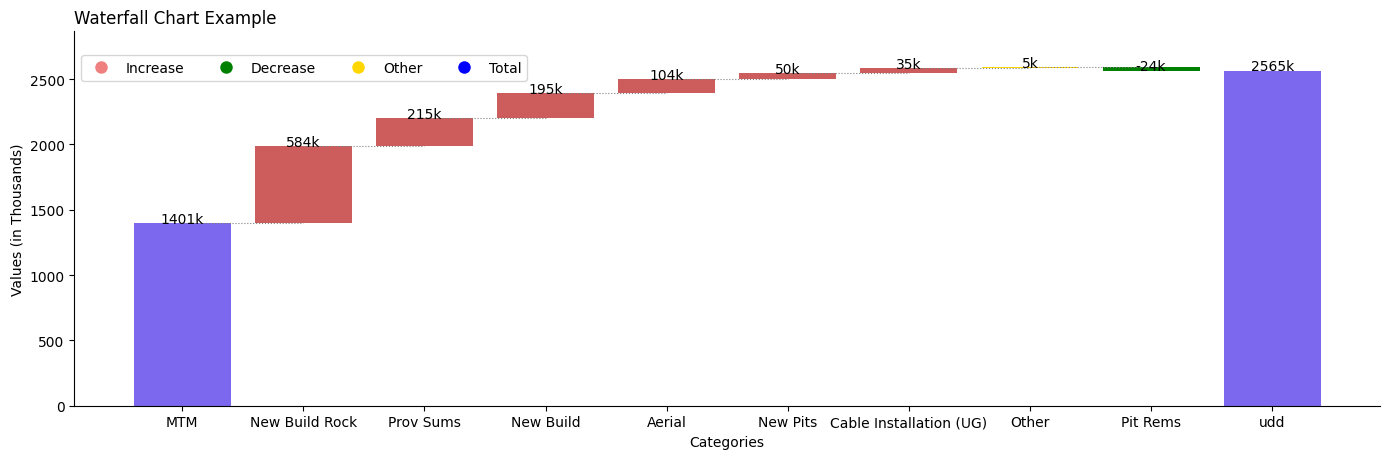

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def format_number(value):
    return '{:.0f}k'.format(value)

def get_bar_color(category, value, next_value):
    if next_value is None:
        return 'green', 'Increase'  # Increasing bar
    if category == 'MTM':
        return 'mediumslateblue', 'Total'  # First bar is blue
    elif value < next_value and category != 'Other':
        return 'green', 'Increase'  # Increasing bar
    elif value > next_value and category != 'Other':
        return 'indianred', 'Decrease'  # Decreasing bar
    elif category == 'Other':
        return 'gold', 'Other'  # 'Other' bar is light yellow
    else:
        return 'gray', 'Unchanged'  # Unchanged bar

def waterfall_chart(categories, values):
    plt.figure(figsize=(14, 5))  # Adjusted the size of the graph
    
    # Convert values to thousands
    values_in_thousands = np.array(values) / 1000
    
    # Initialize the cumulative sum to 0
    cumsum = 0
    
    # Plotting the waterfall bars with formatted value labels
    for i, (category, value) in enumerate(zip(categories, values_in_thousands)):
        bar_color, legend_label = get_bar_color(category, value, values_in_thousands[i + 1] if i < len(categories) - 1 else None)
        plt.bar(category, value, bottom=cumsum, color=bar_color, edgecolor='none', label=legend_label)  # Added label for legend
        plt.text(category, cumsum + value + 0.3, format_number(value), ha='center', color='black')  # Adjusted the vertical position and text color
        cumsum += value
        
        # Draw lines between bars (except for the last bar)
        if i < len(categories) - 1:
            plt.plot([category, categories[i + 1]], [cumsum, cumsum], color='gray', linestyle='dotted', linewidth=0.8)
    
    # Adding the last cumulative bar
    plt.bar('udd', cumsum, color='mediumslateblue', edgecolor='none', label='Total')  # Added label for legend
    plt.text('udd', cumsum + 0.3, format_number(cumsum), ha='center', color='black')  # Adjusted the vertical position and text color
    
    # Setting x-axis ticks and labels
    plt.xticks(categories + ['udd'])
    
    # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel('Values (in Thousands)')
    plt.title('Waterfall Chart Example', loc='left')  # Moved title to the left
    
    # Adding legend
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
    
    # Custom legends in upper left side below title in a horizontal way with small circles
    custom_legends = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
    ]
    custom_legend_labels = ['Increase', 'Decrease', 'Other', 'Total']
    plt.legend(custom_legends, custom_legend_labels, loc='lower left', bbox_to_anchor=(0, 0.85), ncol=4)
    
    # Adjust y-axis limits to add space above the graph
    plt.ylim(top=cumsum + 300)  # You can adjust the value as needed
    
    # Remove the top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Show the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjusted layout with more space at the top
    plt.show()

# Example data
categories = ['MTM', 'New Build Rock', 'Prov Sums', 'New Build', 'Aerial', 'New Pits', 'Cable Installation (UG)', 'Other', 'Pit Rems']
values = [1401000, 584000, 215000, 195000, 104000, 50000, 35000, 5000, -24000]

# Create a waterfall chart with updated colors, removed border, added legend, and custom legends with circles
waterfall_chart(categories, values)
